# **Missing Data Handling**
> Date: 2021/10/06<br>
> TA: Chiao-Ya, Hsu

In [1]:
import pandas as pd
import numpy as np
import os
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

# Quick Analysis with Pandas

In [2]:
# Data type of every columns in dataframe
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           7303 non-null   object 
 1   TIME                           7303 non-null   object 
 2   BOROUGH                        6920 non-null   object 
 3   ZIP CODE                       6919 non-null   float64
 4   LATITUDE                       7303 non-null   float64
 5   LONGITUDE                      7303 non-null   float64
 6   LOCATION                       7303 non-null   object 
 7   ON STREET NAME                 6238 non-null   object 
 8   CROSS STREET NAME              6166 non-null   object 
 9   OFF STREET NAME                761 non-null    object 
 10  NUMBER OF PERSONS INJURED      7303 non-null   int64  
 11  NUMBER OF PERSONS KILLED       7303 non-null   int64  
 12  NUMBER OF PEDESTRIANS INJURED  7303 non-null   i

In [3]:
# Statistics details of every columns in dataframe
collisions.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLISTS INJURED,NUMBER OF CYCLISTS KILLED
count,6919.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,0.0,0.0
mean,10900.746640,40.717653,-73.921406,0.350678,0.000959,0.133644,0.000822,NaN,NaN
std,551.568724,0.069437,0.083317,0.707873,0.030947,0.362129,0.028653,NaN,NaN
min,10001.000000,40.502341,-74.248277,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,10310.000000,40.670865,-73.980744,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,11211.000000,40.723260,-73.933888,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,11355.000000,40.759527,-73.864463,1.000000,0.000000,0.000000,0.000000,NaN,NaN
max,11694.000000,40.909628,-73.702590,16.000000,1.000000,3.000000,1.000000,NaN,NaN


In [4]:
# Check for missing values
count_nan = collisions.isnull().sum()
print ('Count of NaN:\n' + str(count_nan))

Count of NaN:
DATE                                0
TIME                                0
BOROUGH                           383
ZIP CODE                          384
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                   1065
CROSS STREET NAME                1137
OFF STREET NAME                  6542
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2    1085
CONTRIBUTING FACTOR VEHICLE 3    7000
CONTRIBUTING FACTOR VEHICLE 4    7244
CONTRIBUTING FACTOR VEHICLE 5    7289
VEHICLE TYPE CODE 1                58
VEHICLE TYPE CODE 2              1520
VEHICLE TYPE CODE 3              7019
VEHICLE TYPE CODE 4              7249
VEHICLE TYPE CODE 5              729

In [5]:
# Unique Values
columns = list(collisions.columns)
print('uniques of each column')
for column in columns:
    print(column,"=",collisions[column].nunique())

uniques of each column
DATE = 215
TIME = 931
BOROUGH = 5
ZIP CODE = 177
LATITUDE = 5728
LONGITUDE = 5728
LOCATION = 5738
ON STREET NAME = 1671
CROSS STREET NAME = 1935
OFF STREET NAME = 757
NUMBER OF PERSONS INJURED = 9
NUMBER OF PERSONS KILLED = 2
NUMBER OF PEDESTRIANS INJURED = 4
NUMBER OF PEDESTRIANS KILLED = 2
NUMBER OF CYCLISTS INJURED = 0
NUMBER OF CYCLISTS KILLED = 0
CONTRIBUTING FACTOR VEHICLE 1 = 2
CONTRIBUTING FACTOR VEHICLE 2 = 31
CONTRIBUTING FACTOR VEHICLE 3 = 6
CONTRIBUTING FACTOR VEHICLE 4 = 4
CONTRIBUTING FACTOR VEHICLE 5 = 2
VEHICLE TYPE CODE 1 = 15
VEHICLE TYPE CODE 2 = 16
VEHICLE TYPE CODE 3 = 12
VEHICLE TYPE CODE 4 = 4
VEHICLE TYPE CODE 5 = 4


# Missingno [(link)](https://github.com/ResidentMario/missingno)
* Provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe.
* Within the missingno library, there are four types of plots for visualising data completeness: **barplot, matrix plot, heatmap, and dendrogram plot**.
* From these plots, we can identify where missing values occur, the extent of the missingness and whether any of the missing values are correlated with each other.

  ## 1. Matrix plot
  * The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
  * When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.
  * It is a great tool if you are working with time-series data.

<AxesSubplot:>

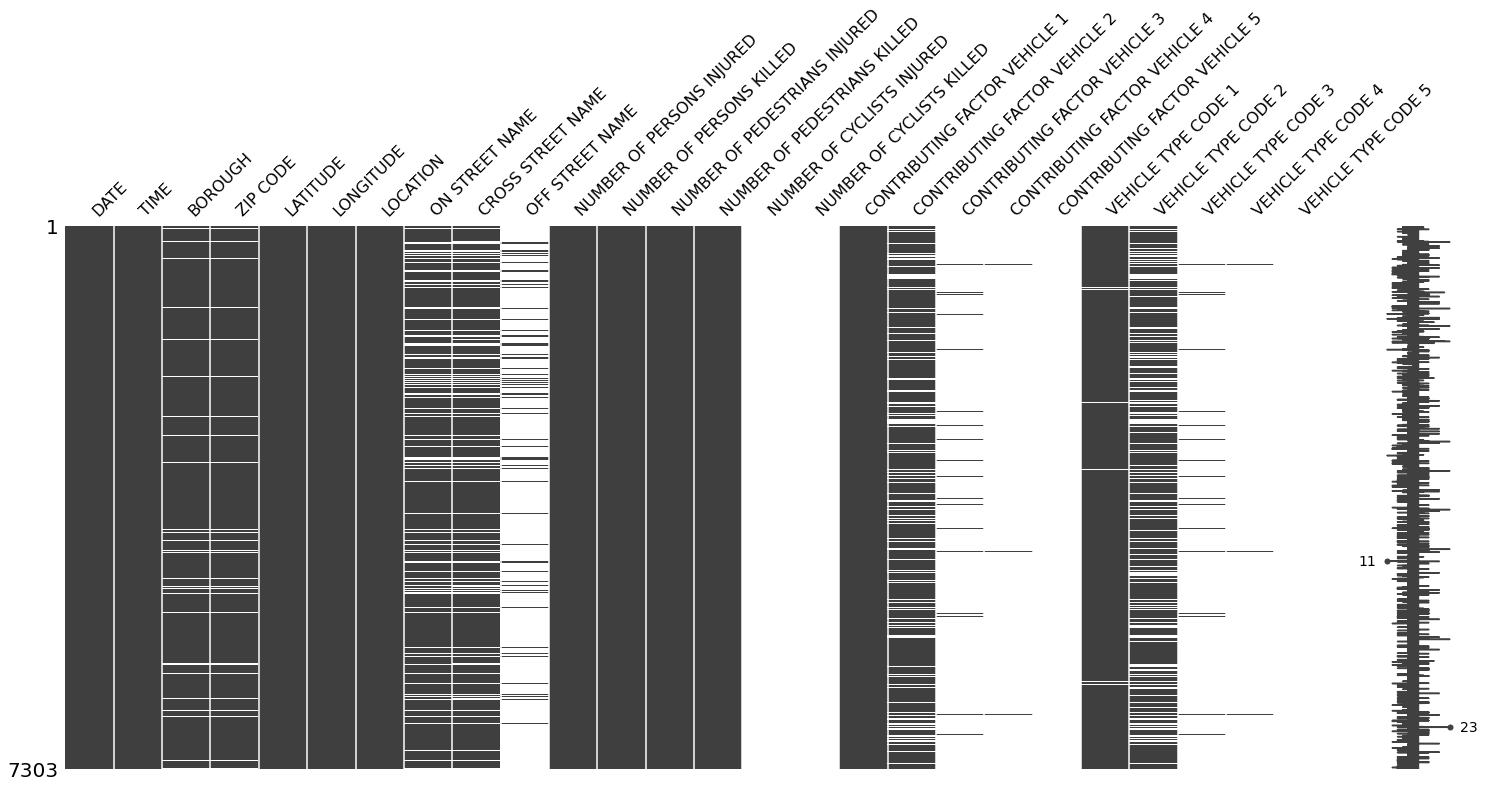

In [6]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions)

## 2. Bar
  * `msno.bar` is a simple visualization of nullity by column.
  * The height of the bar indicates how complete that column is, i.e, **how many non-null values are present**.

<AxesSubplot:>

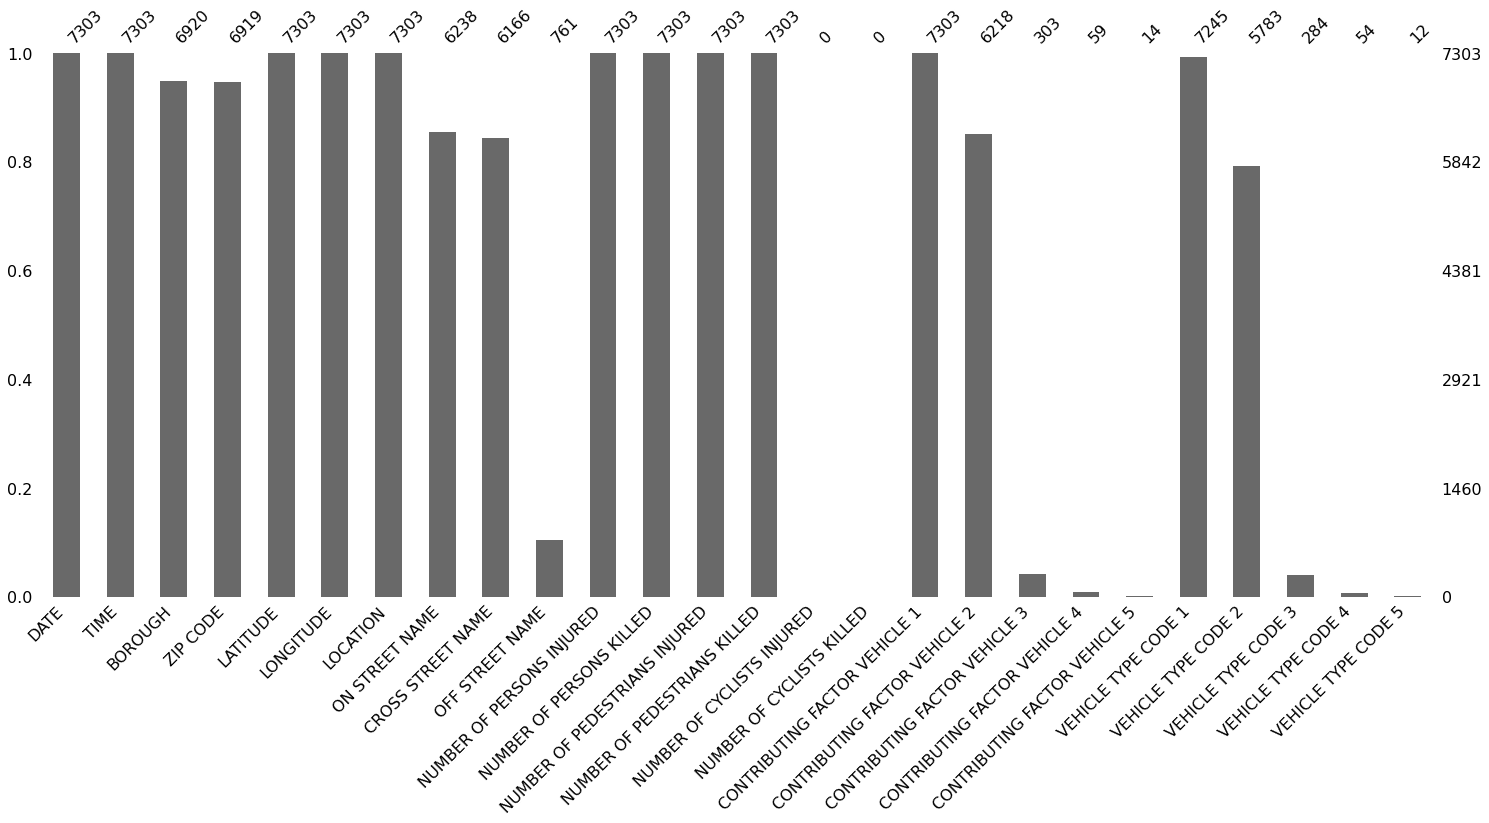

In [7]:
msno.bar(collisions)

C:\Users\statshiba\anaconda3\lib\site-packages\missingno\missingno.py:265: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

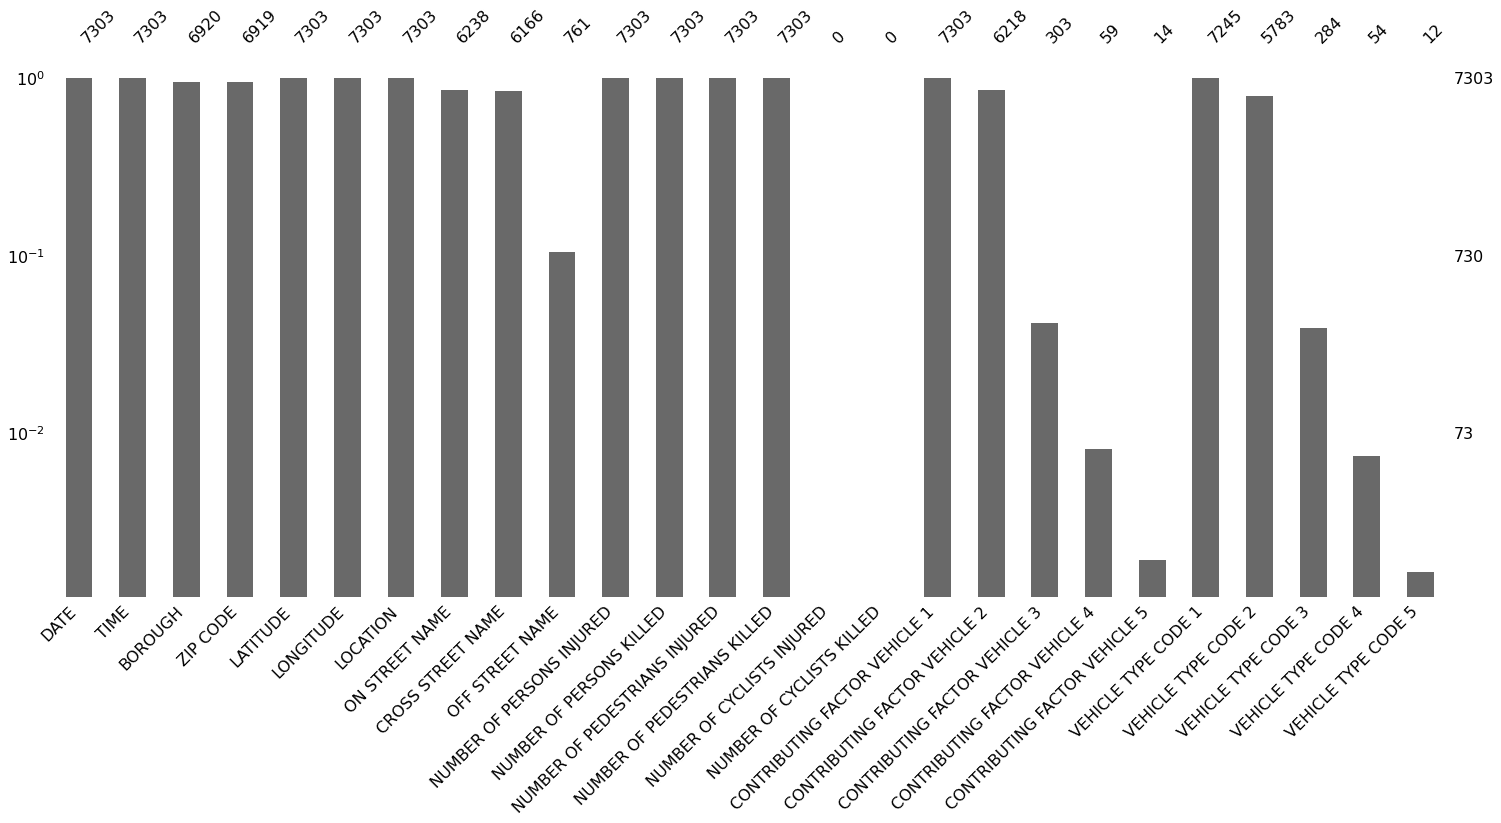

In [8]:
# Take log
msno.bar(collisions, log=True)

## 3. Heatmap
  * It is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if **there is a relationship in the presence of null values between each of the columns**.
  * Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
  * Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column.
  * Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.
  * There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.
  * Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
  * It is more suitable for smaller datasets.




<AxesSubplot:>

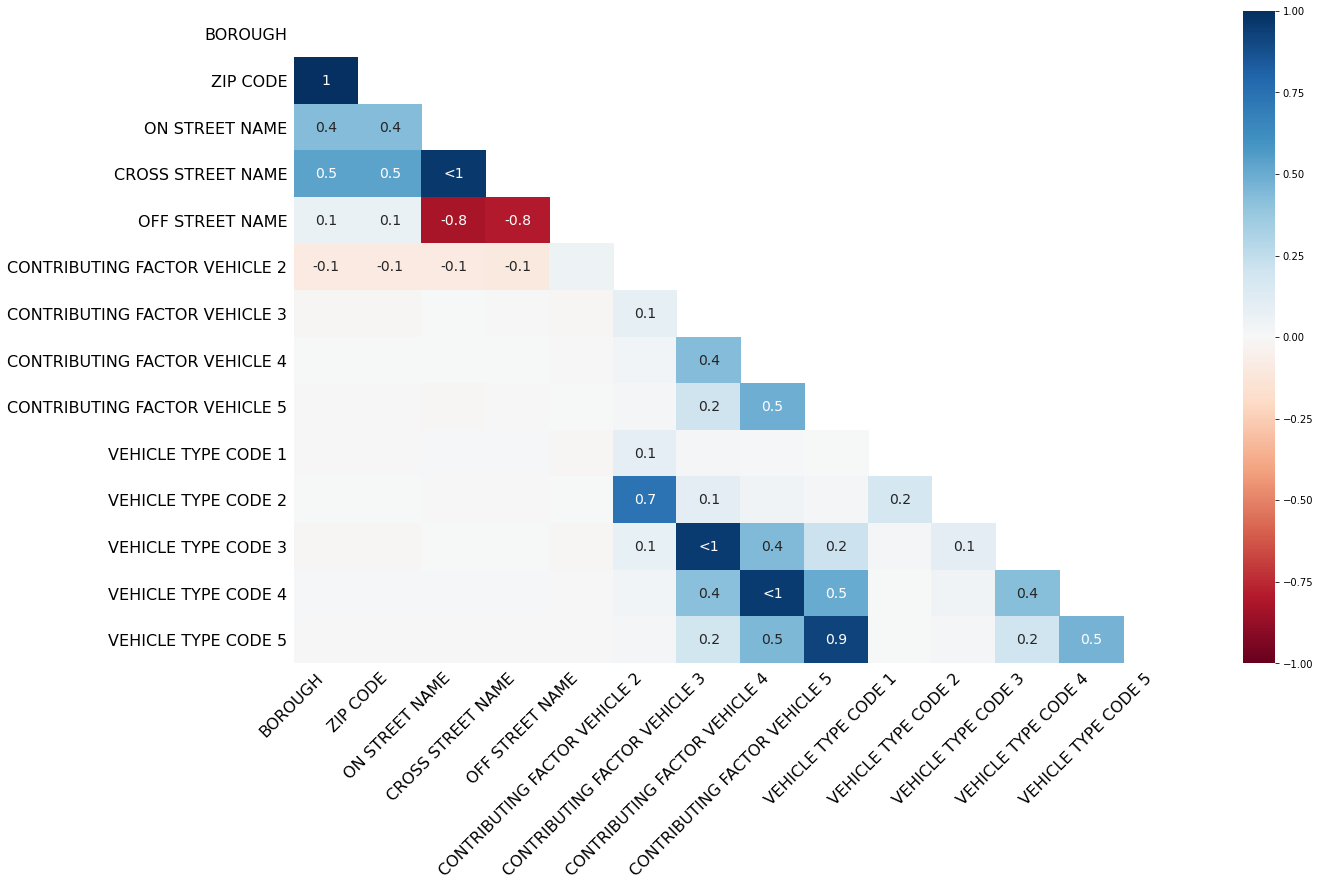

In [9]:
msno.heatmap(collisions)

## 4. dendrogram
  * Provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.
  * The more separated the columns in the tree, the less likely the null values can be correlated between the columns.



<AxesSubplot:>

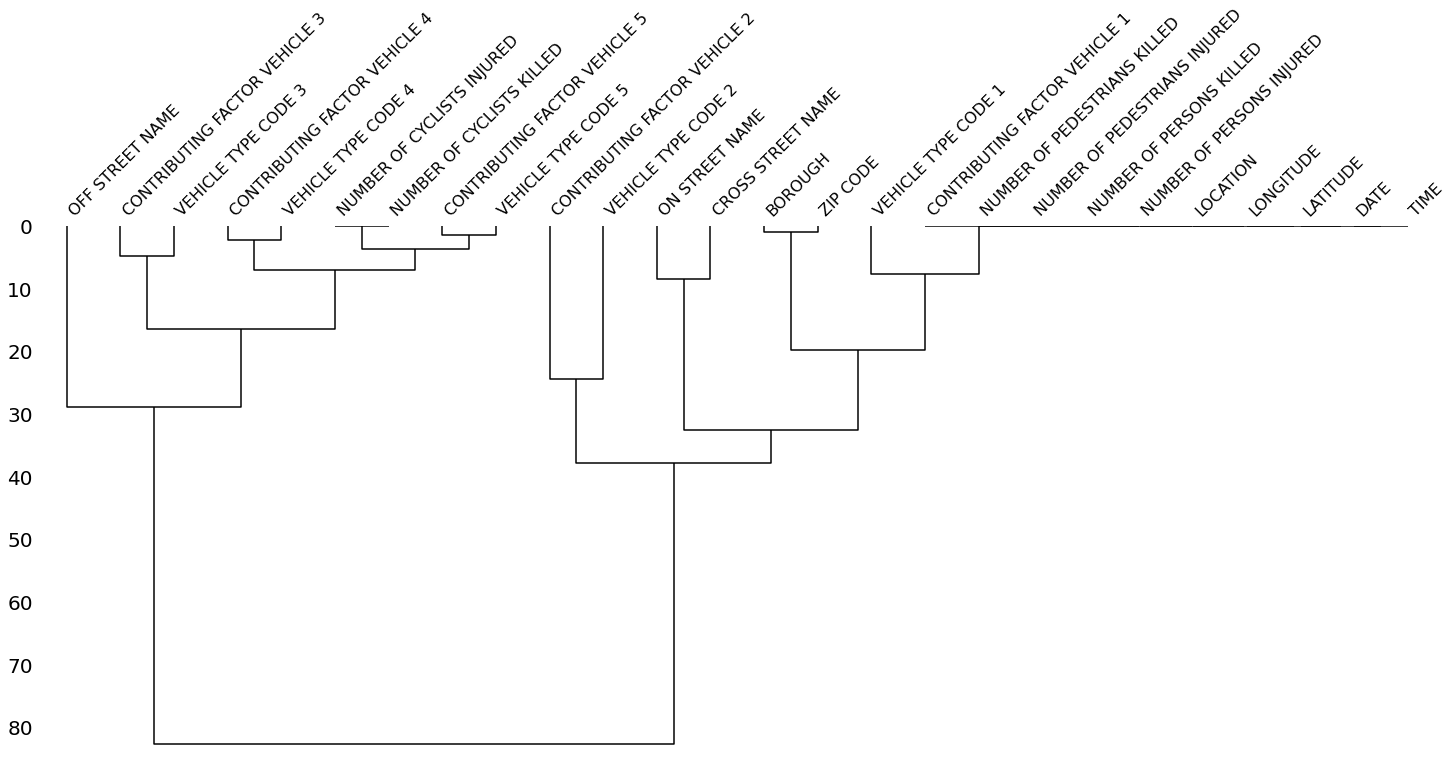

In [10]:
msno.dendrogram(collisions)

# fancyimpute [(link)](https://github.com/iskandr/fancyimpute)
  * Using machine learning algorithm to impute missing values.
  * There are many ways missing data can be imputed using fancyimpute:
    * `SimpleFill`: Replaces missing entries with the mean or median of each column.
    * `KNN`: Nearest neighbor imputations which weights samples using the mean squared difference on features for which two rows both have observed data.
    * `SoftImpute`: Matrix completion by iterative soft thresholding of SVD decompositions.
    * `IterativeImputer`: A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.
    * `IterativeSVD`: Matrix completion by iterative low-rank SVD decomposition.
    * `MatrixFactorization`: Direct factorization of the incomplete matrix into low-rank U and V, with an L1 sparsity penalty on the elements of U and an L2 penalty on the elements of V.
    * `NuclearNormMinimization`: Simple implementation of Exact Matrix Completion via Convex Optimization by Emmanuel Candes and Benjamin Recht using cvxpy.
    * `BiScaler`: Iterative estimation of row/column means and standard deviations to get doubly normalized matrix. 

##  1. SimpleFill
  * Possible values for `fill_method=`:
            "zero": fill missing entries with zeros
            "mean": fill with column means
            "median": fill with column medians
            "min": fill with min value per column
            "random": fill with gaussian noise according to mean/std of column

In [11]:
# Fill missing entries with zeros
from fancyimpute import SimpleFill
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4],
                   [5,      7,  8,     2],
                   [2,      5,  7,     9]],
                  columns = list('ABCD'))
print(df, '\n')

imputer = SimpleFill(fill_method='zero')
df_impute = imputer.fit_transform(df)
print(df_impute)

     A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  NaN  NaN  NaN  5
3  NaN  3.0  NaN  4
4  5.0  7.0  8.0  2
5  2.0  5.0  7.0  9 

[[0. 2. 0. 0.]
 [3. 4. 0. 1.]
 [0. 0. 0. 5.]
 [0. 3. 0. 4.]
 [5. 7. 8. 2.]
 [2. 5. 7. 9.]]


In [12]:
# Fill with column means
print(df, '\n')

imputer = SimpleFill(fill_method='mean')
df_impute = imputer.fit_transform(df)
print(df_impute)

     A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  NaN  NaN  NaN  5
3  NaN  3.0  NaN  4
4  5.0  7.0  8.0  2
5  2.0  5.0  7.0  9 

[[3.33333333 2.         7.5        0.        ]
 [3.         4.         7.5        1.        ]
 [3.33333333 4.2        7.5        5.        ]
 [3.33333333 3.         7.5        4.        ]
 [5.         7.         8.         2.        ]
 [2.         5.         7.         9.        ]]


## 2. KNN (K-Nearest Neighbor)
  * K: number of neighboring rows to use for imputation, default=5
  * orientation: Which axis of the input matrix should be treated as a sample, default='rows'


In [13]:
from fancyimpute import KNN
print(df, '\n')

# Use 3 nearest rows which have a feature to fill in each row's missing features
imputer = KNN(k=3)

# row’s missing features
df_impute = imputer.fit_transform(df)
print(df_impute)

     A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  NaN  NaN  NaN  5
3  NaN  3.0  NaN  4
4  5.0  7.0  8.0  2
5  2.0  5.0  7.0  9 

Imputing row 1/6 with 2 missing, elapsed time: 0.000
[[3.23556938 2.         7.75630267 0.        ]
 [3.         4.         7.825      1.        ]
 [3.67647071 3.43195251 7.64000033 5.        ]
 [3.35514006 3.         7.59183674 4.        ]
 [5.         7.         8.         2.        ]
 [2.         5.         7.         9.        ]]


## 3. MICE (Multiple Imputation by Chained Equation)
  * MICE perform multiple regression over the sample data and take averages of them.
  * `IterativeImputer`: A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a iterative fashion.

In [14]:
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer
print(df, '\n')
  
# calling the MICE class
imputer = IterativeImputer()
# imputing the missing value with mice imputer
df_impute = imputer.fit_transform(df)
  
# printing dataframe
print(df_impute)

     A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  NaN  NaN  NaN  5
3  NaN  3.0  NaN  4
4  5.0  7.0  8.0  2
5  2.0  5.0  7.0  9 

[[1.7391347  2.         7.9067307  0.        ]
 [3.         4.         7.91935316 1.        ]
 [2.3043078  4.23523745 7.44166795 5.        ]
 [1.60869925 3.         7.48106617 4.        ]
 [5.         7.         8.         2.        ]
 [2.         5.         7.         9.        ]]


# GRAPE
  * GRAPE is a general framework for feature imputation and label prediction in the presence of missing data.
  * The missing data problem has previously been approached in two different ways:
    * **Feature imputation**: missing feature values are estimated based on observed values.
    * **Label prediction**: downstream labels are learned directly from incomplete data.
  * Website: [link](http://snap.stanford.edu/grape/)
  * Github: [link](https://github.com/maxiaoba/GRAPE/tree/0ea0c59272a977d0184a8fd95178f68211455ef5)

  ## 1. Download GRAPE from Github

In [10]:
!git clone https://github.com/maxiaoba/GRAPE.git

Cloning into 'GRAPE'...


  ## 2. Load new dataset
  * 將新資料集轉換成 **txt檔**
  * 存放至 **"/GRAPE/uci/raw_data/{新資料集名字}/data"**
  * 命名為 **"data.txt"**
  * 資料集建議格式:

  ![連結文字](https://drive.google.com/uc?id=1odkn3niJazLekfr6QY51YEJjn8rDdZgx)

  * 轉換成 **txt檔**:

  ![連結文字](https://drive.google.com/uc?id=17j5ccmzQEkM3TBUnPLU1kxDnIsryaSVP)


In [16]:
# Loading new UCI dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality)
csv_name = 'winequality-red.csv'
data = pd.read_csv(csv_name, sep=';')

# Convert to .txt file
data.to_csv('GRAPE/uci/raw_data/{}/data/data.txt'.format(csv_name[:csv_name.find('.csv')]), header=None, index=None, sep=' ', mode='a')

## 3. Feature imputation
  * 執行GRAPE中的 **train_mdi.py**
  * 設定程式中的參數:
    ![連結文字](https://drive.google.com/uc?id=1NP57OvppR_bmpbpH55ZBf4xzfo6M63Uo)
    
  * 最後放入 **uci --data {新資料集名字}**
  * 參考連結: [link](https://github.com/maxiaoba/GRAPE/blob/0ea0c59272a977d0184a8fd95178f68211455ef5/train_mdi.py)

In [21]:
!python GRAPE/train_mdi.py --epochs 100 --valid 0.1 --save_model --save_prediction uci --data winequality-red

Namespace(aggr='mean', auto_known=False, concat_states=False, data='winequality-red', domain='uci', dropout=0.0, edge_dim=64, edge_mode=1, epochs=100, gnn_activation='relu', impute_activation='relu', impute_hiddens='64', known=0.7, log_dir='0', loss_mode=0, lr=0.001, mode='train', model_types='EGSAGE_EGSAGE_EGSAGE', node_dim=64, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, save_model=True, save_prediction=True, seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, transfer_dir=None, transfer_extra='', valid=0.1, weight_decay=0.0)
Using CPU
['EGSAGE', 'EGSAGE', 'EGSAGE'] [True, True, True] [64]
total trainable_parameters:  26
valid mask sum:  tensor(1213)
train edge num is 22190, valid edge num is 2426, test edge num is input 24616 output 10562
epoch:  0
loss:  0.21579113602638245
valid rmse:  0.4417569615474529
valid l1:  0.4025419056415558
te

## 4. Label prediction
  * 執行GRAPE中的 **train_y.py**
  * 設定程式中的參數:
    ![連結文字](https://drive.google.com/uc?id=1RpNBjC7TkobyTJsY7FUcgaxiE6CFr77r)
    
  * 最後放入 **uci --data {新資料集名字}**
  * 參考連結: [link](https://github.com/maxiaoba/GRAPE/blob/0ea0c59272a977d0184a8fd95178f68211455ef5/train_y.py)

In [22]:
!python GRAPE/train_y.py --epochs 100 --valid 0.1 uci --data winequality-red

Namespace(aggr='mean', concat_states=False, data='winequality-red', domain='uci', dropout=0.0, edge_dim=16, edge_mode=1, epochs=100, gnn_activation='relu', impute_activation='relu', impute_hiddens='', known=0.7, log_dir='y0', lr=0.001, model_types='EGSAGE_EGSAGE', node_dim=16, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, predict_hiddens='', seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, valid=0.1, weight_decay=0.0)
Using CPU
['EGSAGE', 'EGSAGE'] [True, True] [16]
all y num is 1599, train num is 1015, valid num is 96, test num is 488
epoch:  0
loss:  32.07559585571289
valid rmse:  5.672862573824095
valid l1:  5.617284774780273
test rmse:  5.51932770933536
test l1:  5.462395191192627
epoch:  1
loss:  31.95680046081543
valid rmse:  5.663318579918181
valid l1:  5.607646465301514
test rmse:  5.509785876258866
test l1:  5.452753067016602
epoc

## 5. 檢視訓練結果
   * Feature imputation存放於 **'uci/test/{新資料集名字}/0/'**
   * Label prediction存放於 **'uci/test/{新資料集名字}/y0/'**
   * 資料夾包含png繪圖、**result.pkl (訓練數據)**

In [23]:
# 檢視 Feature imputation 訓練數據
import pickle
fr = open('uci/test/winequality-red/0/result.pkl', 'rb')
df = pickle.load(fr)

print('Items of result.pkl: ', df.keys())
print('\nargs: ', df['args'])
print('\noutputs: ', df['outputs'])
print('\ncurves: ', df['curves'])
print('\nlr: ', df['lr'])

Items of result.pkl:  dict_keys(['args', 'outputs', 'curves', 'lr'])

args:  Namespace(aggr='mean', auto_known=False, concat_states=False, data='winequality-red', domain='uci', dropout=0.0, edge_dim=64, edge_mode=1, epochs=100, gnn_activation='relu', impute_activation='relu', impute_hiddens='64', known=0.7, log_dir='0', loss_mode=0, lr=0.001, mode='train', model_types='EGSAGE_EGSAGE_EGSAGE', node_dim=64, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, save_model=True, save_prediction=True, seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, transfer_dir=None, transfer_extra='', valid=0.1, weight_decay=0.0)

outputs:  {'best_valid_rmse_pred_test': array([0.26635578, 0.26793295, 0.26446655, ..., 0.26446322, 0.2679927 ,
       0.2646155 ], dtype=float32), 'best_valid_l1_pred_test': array([0.23217627, 0.2324912 , 0.23249736, ..., 0.23249322, 0.2324

In [24]:
# 檢視 Label prediction 訓練數據
fr = open('uci/test/winequality-red/y0/result.pkl', 'rb')
df = pickle.load(fr)

print('Items of result.pkl: ', df.keys())
print('\nargs: ', df['args'])
print('\noutputs: ', df['outputs'])
print('\ncurves: ', df['curves'])
print('\nlr: ', df['lr'])

Items of result.pkl:  dict_keys(['args', 'curves', 'lr', 'outputs'])

args:  Namespace(aggr='mean', concat_states=False, data='winequality-red', domain='uci', dropout=0.0, edge_dim=16, edge_mode=1, epochs=100, gnn_activation='relu', impute_activation='relu', impute_hiddens='', known=0.7, log_dir='y0', lr=0.001, model_types='EGSAGE_EGSAGE', node_dim=16, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, predict_hiddens='', seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, valid=0.1, weight_decay=0.0)

outputs:  {'pred_train': array([5.892724 , 5.89454  , 5.891065 , ..., 5.888891 , 5.890932 ,
       5.8898525], dtype=float32), 'label_train': array([5., 5., 6., ..., 6., 5., 6.], dtype=float32), 'pred_test': array([5.9742637, 5.9789753, 5.9727554, 5.9767456, 5.9744296, 5.977765 ,
       5.9761257, 5.975622 , 5.974798 , 5.9736304, 5.9808493, 5.978892

# Summary
1. Quick Analysis with Pandas
2. Missingno:
  * matrix plot
  * bar
  * heatmap
  * dendrogram
3. fancyimpute:
  * SimpleFill
  * KNN
  * MICE
4. GRAPE: 
  * Download GRAPE from Github
  * Load new dataset
  * Coding feature imputation 
  * Coding label prediction
  * View training results



### If any questions, please contact the TAs via TA hours, moodle, or email.